Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
path="/content/drive/MyDrive/Escuela/6 Sexto/ANLP/Examen/dataset/dataset_1.csv"
data = pd.read_csv(path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   indice                          32 non-null     int64  
 1   autor                           32 non-null     object 
 2   nombre                          32 non-null     object 
 3   num_sentences                   32 non-null     int64  
 4   num_words                       32 non-null     int64  
 5   num_unique_words                32 non-null     int64  
 6   num_stopwords                   32 non-null     int64  
 7   num_punctuation                 32 non-null     int64  
 8   punctuation_to_sentence_ratio   32 non-null     float64
 9   unique_to_total_words_ratio     32 non-null     float64
 10  stopwords_to_total_words_ratio  32 non-null     float64
 11  num_syllables                   32 non-null     int64  
 12  FRE                             32 non

In [2]:
data = pd.read_csv("./bookDataset.csv")

Análisis Exploratorio de los Datos

In [ ]:
# Mostrar información del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   num_sentences                   32 non-null     int64  
 1   num_words                       32 non-null     int64  
 2   num_unique_words                32 non-null     int64  
 3   num_stopwords                   32 non-null     int64  
 4   num_punctuation                 32 non-null     int64  
 5   punctuation_to_sentence_ratio   32 non-null     float64
 6   unique_to_total_words_ratio     32 non-null     float64
 7   stopwords_to_total_words_ratio  32 non-null     float64
 8   num_syllables                   32 non-null     int64  
 9   FRE                             32 non-null     float64
 10  FKGL                            32 non-null     float64
 11  labels                          32 non-null     int64  
dtypes: float64(5), int64(7)
memory usage: 

In [ ]:
# Obtener los primeros registros del conjunto de datos
data.head()

,num_sentences,num_words,num_unique_words,num_stopwords,num_punctuation,punctuation_to_sentence_ratio,unique_to_total_words_ratio,stopwords_to_total_words_ratio,num_syllables,FRE,FKGL
0,3541,80137,11704,31827,14876,4.201073,0.146050,0.397157,137624,38.575781,13.500996
1,6122,84425,12157,27171,24607,4.019438,0.143998,0.321836,138281,54.270080,9.115668
2,4519,106186,15082,39483,20812,4.605444,0.142034,0.371829,184732,35.806066,14.102578
3,2760,73791,11211,29243,12391,4.489493,0.151929,0.396295,129535,31.188640,15.551074
4,5124,107027,14091,40279,22819,4.453357,0.131658,0.376344,189006,36.233607,13.394477


In [ ]:
# Obtener dimensiones del conjunto de datos
row, col = data.shape
print(f'Columnas: {col}\nFilas: {row}')

Columnas: 12
Filas: 32


In [ ]:
# Obtener nombre de las columnas
cols = list(data.columns)

print('Columnas:')

for col in cols:
  print(f'\t{col}')

Columnas:
	num_sentences
	num_words
	num_unique_words
	num_stopwords
	num_punctuation
	punctuation_to_sentence_ratio
	unique_to_total_words_ratio
	stopwords_to_total_words_ratio
	num_syllables
	FRE
	FKGL


In [ ]:
# Obtener cantidad de valores únicos
data.nunique()

num_sentences                     32
num_words                         32
num_unique_words                  32
num_stopwords                     32
num_punctuation                   32
punctuation_to_sentence_ratio     32
unique_to_total_words_ratio       32
stopwords_to_total_words_ratio    32
num_syllables                     32
FRE                               32
FKGL                              32
dtype: int64

In [ ]:
# Obtener valores nulos de cada columna
data.isnull().sum()

num_sentences                     0
num_words                         0
num_unique_words                  0
num_stopwords                     0
num_punctuation                   0
punctuation_to_sentence_ratio     0
unique_to_total_words_ratio       0
stopwords_to_total_words_ratio    0
num_syllables                     0
FRE                               0
FKGL                              0
dtype: int64

In [ ]:
# 0btener un resumen estadístico de todo el conjunto de datos
data.describe()

,num_sentences,num_words,num_unique_words,num_stopwords,num_punctuation,punctuation_to_sentence_ratio,unique_to_total_words_ratio,stopwords_to_total_words_ratio,num_syllables,FRE,FKGL,labels
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,4454.468750,98945.562500,13380.906250,37604.906250,17556.468750,4.052531,0.146196,0.382055,174120.031250,34.419095,14.253430,0.500000
std,2239.564618,43443.503857,3705.615106,16269.585916,7958.623876,0.569793,0.030542,0.019448,77772.636913,5.656825,1.656577,0.508001
min,553.000000,15630.000000,3930.000000,6150.000000,2233.000000,2.962236,0.098856,0.321836,28481.000000,21.628203,9.115668,0.000000
25%,3203.500000,73714.500000,11467.750000,27332.250000,12373.000000,3.605315,0.129200,0.371395,128704.750000,31.333512,13.357485,0.000000
50%,3816.500000,91973.500000,12885.000000,35323.500000,16291.500000,4.028706,0.141955,0.388454,162119.500000,34.220046,14.266037,0.500000
75%,5273.750000,113331.500000,15134.000000,45549.500000,21313.750000,4.456710,0.155209,0.395723,200075.250000,37.208086,15.010313,1.000000
max,10141.000000,236586.000000,23388.000000,92529.000000,36199.000000,5.372831,0.251440,0.406009,424487.000000,54.270080,18.752211,1.000000


In [ ]:
# Función para caracterizar cada dimensión del conjunto de datos
def resume_data(data):

  # Obtener información de cada columna
  for column in data.columns:

    # Nombre de columna
    column_name = column

    # Tipo de dato de columna
    data_type = str(data[column].dtype)

    # Determinar si es numérica o categórica
    if data[column].dtype in ['int64', 'float64']:
        tipo_variable = "Numérica"
    else:
        tipo_variable = "Categórica"

    print(f"Columna: {column_name}")
    print(f"Tipo de variable: {tipo_variable}")
    print(f"Tipo de dato: {data_type}")
    print("------------------------------------")

resume_data(data)

Columna: num_sentences
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: num_words
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: num_unique_words
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: num_stopwords
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: num_punctuation
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: punctuation_to_sentence_ratio
Tipo de variable: Numérica
Tipo de dato: float64
------------------------------------
Columna: unique_to_total_words_ratio
Tipo de variable: Numérica
Tipo de dato: float64
------------------------------------
Columna: stopwords_to_total_words_ratio
Tipo de variable: Numérica
Tipo de dato: float64
------------------------------------
Columna: num_syllables
Tipo de variable: Numérica
Tipo de dato: int64
--------------------

Sobremuestreo del Conjunto Inicial de Datos

In [3]:
# Leemos conjunto de datos con información de los libros
data = pd.read_csv("./bookDataset.csv")

col = list(data.columns)

# Separar características y etiquetas en variables distintas
X = data[col[0:11]]
y = data[col[11]]

# Contar el número actual de muestras por etiqueta
muestras_por_etiqueta = y.value_counts()

# Calcular el número de muestras adicionales deseadas para cada etiqueta
muestras_adicionales = 20
objetivo_muestras = muestras_por_etiqueta + muestras_adicionales

# Crear un diccionario con las etiquetas y el número de muestras objetivo
sampling_strategy = objetivo_muestras.to_dict()

# Aplicar técnicas de generación de datos para crear muestras sintéticas
sampler = SMOTE(sampling_strategy=sampling_strategy)
X_synthetic, y_synthetic = sampler.fit_resample(X, y)

# Crear un nuevo conjunto de datos con las muestras sintéticas
data_synthetic = pd.DataFrame({
    'num_sentences': X_synthetic['num_sentences'],
    'num_words': X_synthetic['num_words'],
    'num_unique_words': X_synthetic['num_unique_words'],
    'num_stopwords': X_synthetic['num_stopwords'],
    'num_punctuation': X_synthetic['num_punctuation'],
    'punctuation_to_sentence_ratio': X_synthetic['punctuation_to_sentence_ratio'],
    'unique_to_total_words_ratio': X_synthetic['unique_to_total_words_ratio'],
    'stopwords_to_total_words_ratio': X_synthetic['stopwords_to_total_words_ratio'],
    'num_syllables': X_synthetic['num_syllables'],
    'FRE': X_synthetic['FRE'],
    'FKGL': X_synthetic['FKGL'],
    'label': y_synthetic
})

# Obtenemos conjunto de datos sintético
data_synthetic.to_csv('syntheticDataset.csv', index=False)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (36) in class 0 will be larger than the number of samples in the majority class (class #0 -> 16)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (36) in class 1 will be larger than the number of samples in the majority class (class #0 -> 16)
  warnings.warn(


Transformación de los Datos

In [5]:
# Leemos conjunto de datos
data = pd.read_csv('./syntheticDataset.csv')

# Inicializar el escalador MinMaxScaler
scaler = StandardScaler()

# Normalizar los datos
data_normalized = scaler.fit_transform(data)

# Crear un nuevo DataFrame con los datos normalizados
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

# Guardamos datos normalizados
data_synthetic.to_csv('syntheticDataset_normalized.csv', index=False)

Funciones para Evaluación de Modelos

In [6]:
# Función para obtener KFold Cross Validation
def cross_validation(classifier, x, y, name_classifier, dataset, cv=5):

  # Crear un objeto de KFold con el número deseado de divisiones (k)
  kf = KFold(n_splits=cv)

  # Realizar la validación cruzada utilizando el modelo de regresión logística y KFold
  scores = cross_val_score(classifier, x, y, cv=kf)

  # Imprimir los resultados de la validación cruzada
  print(f"Para el clasificador: {name_classifier}\nConjunto de datos: {dataset}")
  print("Accuracy de cada fold:", scores)
  print("Accuracy promedio:", np.mean(scores))

In [7]:
# Función para evaluar modelo de clasificación
def evaluate_classifier(classifier, test_vectors, test_labels):

  # Realizar predicciones
  predictions = classifier.predict(test_vectors)

  # Matriz de Confusión
  matriz = confusion_matrix(test_labels, predictions)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = [False, True])
  cm_display.plot()
  plt.show()

  # Calcular la precisión del modelo
  precision = precision_score(test_labels, predictions, average='macro')
  print('Precisión del modelo:')
  print(precision)

  # Calcular la exactitud del modelo
  accuracy = accuracy_score(test_labels, predictions)
  print('Exactitud del modelo:')
  print(accuracy)

  # Calcular la recall del modelo
  recall = recall_score(test_labels, predictions, average='macro')
  print('Recall del modelo:')
  print(recall)

  # Calcular la F1-Score del modelo
  f1 = f1_score(test_labels, predictions, average='macro')
  print('Puntuación f1 del modelo:')
  print(f1)

Generación de Modelos de Clasificación

Datos originales

In [27]:
# Prueba con dataset original #
# ---------------------------- #

data = pd.read_csv('/content/bookDataset.csv')

X = data.iloc[1:, 0:11].values
y = data.iloc[1:,11].values

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Modelo De Datos Originales
[[1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]]


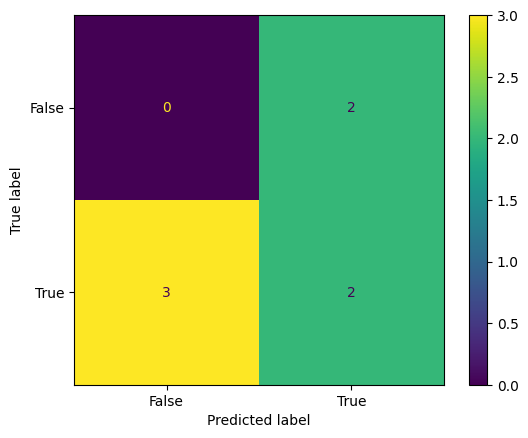

Precisión del modelo:
0.25
Exactitud del modelo:
0.2857142857142857
Recall del modelo:
0.2
Puntuación f1 del modelo:
0.22222222222222224


Para el clasificador: GaussianNB
Conjunto de datos: Texto Crudo
Accuracy de cada fold: [0.8  0.8  0.6  0.4  0.25]
Accuracy promedio: 0.5700000000000001


In [28]:
print('Modelo De Datos Originales')

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

evaluate_classifier(classifier, X_test, y_test)

print('\n')

cross_validation(classifier, X_train, y_train, 'GaussianNB', 'Texto Crudo', cv=5)

Modelo De Datos Originales Estandarizados
[[1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]]


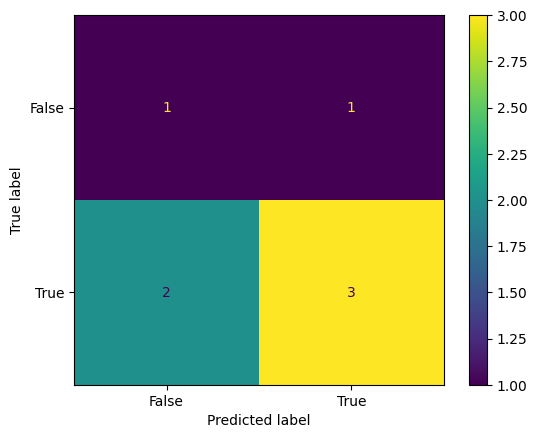

Precisión del modelo:
0.5416666666666666
Exactitud del modelo:
0.5714285714285714
Recall del modelo:
0.55
Puntuación f1 del modelo:
0.5333333333333332


Para el clasificador: GaussianNB
Conjunto de datos: Texto Estandarizado
Accuracy de cada fold: [0.8  0.6  0.8  0.4  0.75]
Accuracy promedio: 0.67


In [29]:
print('Modelo De Datos Originales Estandarizados')

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = GaussianNB()
classifier.fit(X_train_sc, y_train)

y_pred = classifier.predict(X_test_sc)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

evaluate_classifier(classifier, X_test_sc, y_test)

print('\n')

cross_validation(classifier, X_train_sc, y_train, 'GaussianNB', 'Texto Estandarizado', cv=5)

Modelo De Datos Originales
[[1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


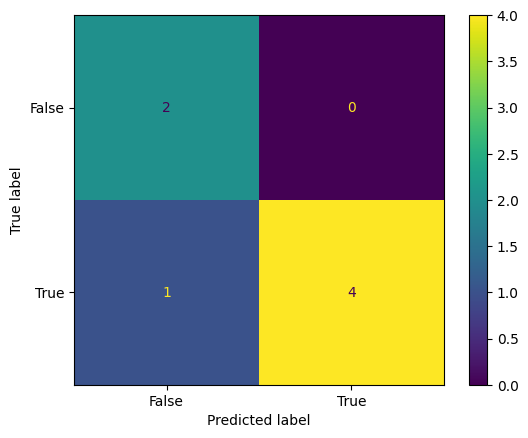

Precisión del modelo:
0.8333333333333333
Exactitud del modelo:
0.8571428571428571
Recall del modelo:
0.9
Puntuación f1 del modelo:
0.8444444444444446


Para el clasificador: Regresion Logística
Conjunto de datos: Texto Crudo
Accuracy de cada fold: [0.8  0.6  1.   1.   0.75]
Accuracy promedio: 0.8300000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [30]:
print('Modelo De Datos Originales')

classifier = LogisticRegression(random_state = 43)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

evaluate_classifier(classifier, X_test, y_test)

print('\n')

cross_validation(classifier, X_train, y_train, 'Regresion Logística', 'Texto Crudo', cv=5)

Modelo De Datos Originales Estandarizados
[[1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


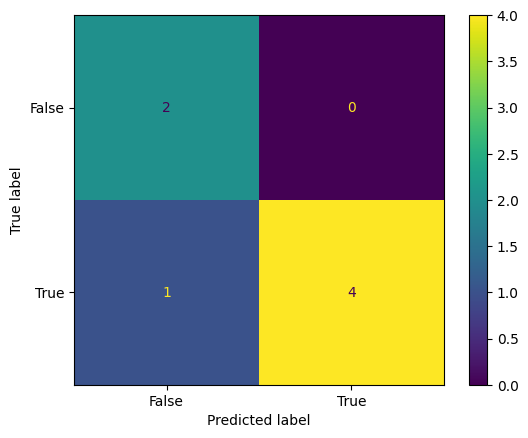

Precisión del modelo:
0.8333333333333333
Exactitud del modelo:
0.8571428571428571
Recall del modelo:
0.9
Puntuación f1 del modelo:
0.8444444444444446


Para el clasificador: Regresion Logística
Conjunto de datos: Texto Crudo
Accuracy de cada fold: [0.8  0.6  1.   1.   0.75]
Accuracy promedio: 0.8300000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [31]:
print('Modelo De Datos Originales Estandarizados')

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(random_state = 43)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

evaluate_classifier(classifier, X_test, y_test)

print('\n')

cross_validation(classifier, X_train, y_train, 'Regresion Logística', 'Texto Crudo', cv=5)

Datos sintéticos

In [ ]:
# Prueba con dataset sintético #
# ---------------------------- #

data = pd.read_csv('/content/syntheticDataset_normalized.csv')

X = data.iloc[1:, 0:11].values
y = data.iloc[1:,11].values

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Modelo De Datos Remuestreados
[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]]


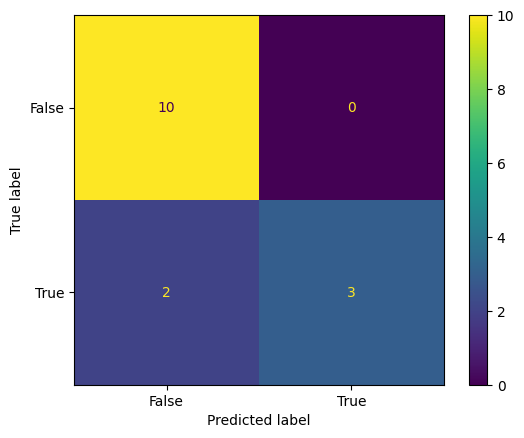

Precisión del modelo:
0.9166666666666667
Exactitud del modelo:
0.8666666666666667
Recall del modelo:
0.8
Puntuación f1 del modelo:
0.8295454545454545


Para el clasificador: GaussianNB
Conjunto de datos: Texto Crudo
Accuracy de cada fold: [0.83333333 0.81818182 0.54545455 0.54545455 0.36363636]
Accuracy promedio: 0.6212121212121213


In [20]:
print('Modelo De Datos Remuestreados')

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

evaluate_classifier(classifier, X_test, y_test)

print('\n')

cross_validation(classifier, X_train, y_train, 'GaussianNB', 'Texto Crudo', cv=5)

Modelo De Datos Remuestreados Estandarizados
[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


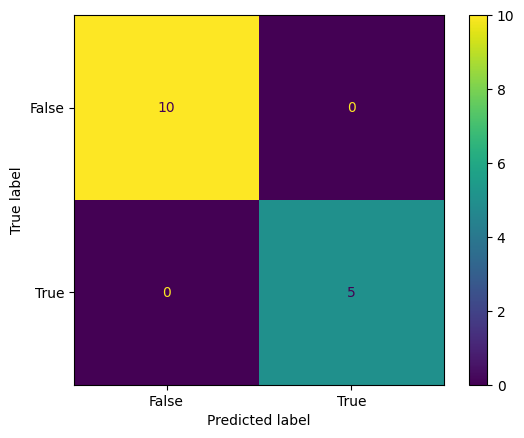

Precisión del modelo:
1.0
Exactitud del modelo:
1.0
Recall del modelo:
1.0
Puntuación f1 del modelo:
1.0


Para el clasificador: GaussianNB
Conjunto de datos: Texto Estandarizado
Accuracy de cada fold: [0.83333333 1.         0.72727273 0.90909091 0.72727273]
Accuracy promedio: 0.8393939393939395


In [24]:
print('Modelo De Datos Remuestreados Estandarizados')

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = GaussianNB()
classifier.fit(X_train_sc, y_train)

y_pred = classifier.predict(X_test_sc)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

evaluate_classifier(classifier, X_test_sc, y_test)

print('\n')

cross_validation(classifier, X_train_sc, y_train, 'GaussianNB', 'Texto Estandarizado', cv=5)

Modelo De Datos Remuestreados
[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]]


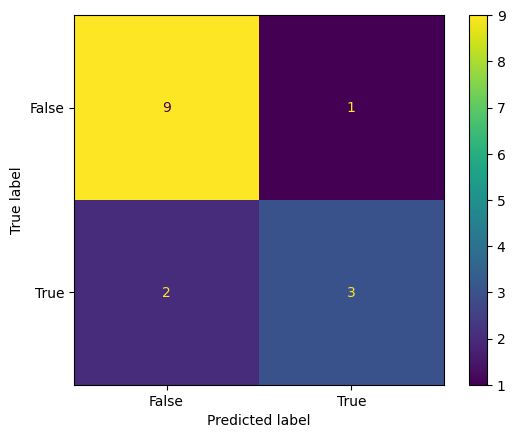

Precisión del modelo:
0.7840909090909092
Exactitud del modelo:
0.8
Recall del modelo:
0.75
Puntuación f1 del modelo:
0.7619047619047619


Para el clasificador: Regresion Logística
Conjunto de datos: Texto Crudo
Accuracy de cada fold: [1.         0.90909091 1.         0.90909091 1.        ]
Accuracy promedio: 0.9636363636363636


In [25]:
print('Modelo De Datos Remuestreados')

classifier = LogisticRegression(random_state = 43)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

evaluate_classifier(classifier, X_test, y_test)

print('\n')

cross_validation(classifier, X_train, y_train, 'Regresion Logística', 'Texto Crudo', cv=5)

Modelo De Datos Remuestreados Estandarizados
[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]]


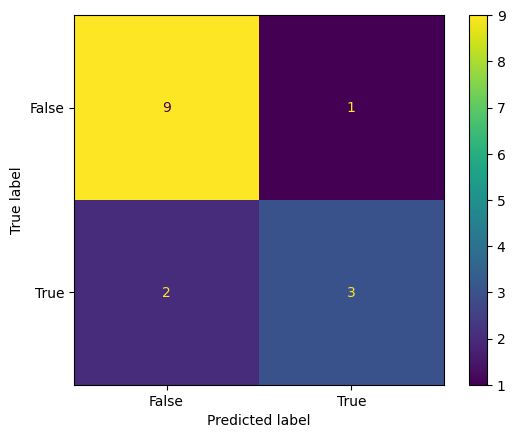

Precisión del modelo:
0.7840909090909092
Exactitud del modelo:
0.8
Recall del modelo:
0.75
Puntuación f1 del modelo:
0.7619047619047619


Para el clasificador: Regresion Logística
Conjunto de datos: Texto Crudo
Accuracy de cada fold: [1.         0.90909091 1.         0.90909091 1.        ]
Accuracy promedio: 0.9636363636363636


In [22]:
print('Modelo De Datos Remuestreados Estandarizados')

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

classifier = LogisticRegression(random_state = 43)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

evaluate_classifier(classifier, X_test, y_test)

print('\n')

cross_validation(classifier, X_train, y_train, 'Regresion Logística', 'Texto Crudo', cv=5)

In [ ]:
X = data.iloc[:, 3:].values
y = data.iloc[:,1].values
print(X)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3 3]
 [0 1]]


0.5714285714285714

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5 1]
 [0 1]]


0.8571428571428571